In [1]:
from services import *
from variants import *
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

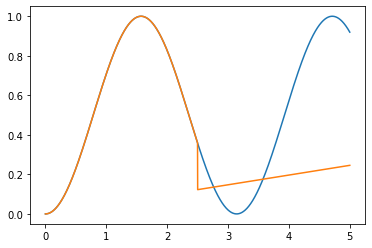

In [2]:
a = 0
b = 2.5

true_x = np.linspace(a, b + b - a, 2000)
true_y = [math.sin(x) ** 2 for x in true_x]

plt.plot(true_x, true_y)
nn = PredictNeuralNetwork(learning_rate=0.1, true_function=f)

for i in range(4, len(true_x[:len(true_x) // 2])):
    nn.epoch(true_x[i - 4: i], true_y[i])

nn_x = true_x
nn_y = list(true_y)[:len(true_y) // 2]

test_part = true_x[(len(true_x) // 2) - 4:]

for i in range(4, len(test_part)):
    nn_y.append(nn.predict(test_part[i - 4: i]))

plt.plot(nn_x, nn_y)



In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = np.linspace(a, b + b - a, 2000)

# [1, 2, 3, 4, 5, 6] -> [[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]]
X = np.array([x[i:i+4] for i in range(x.shape[0] - 4)])
X = np.sin(X) ** 2 
# ^ вот это обучающая выборка - значения sin^2 (t) в во временных интервалах от t-4 до t-1, тут shape (1996, 4)

t = np.array(x[4:]) # - тупа время
y = np.sin(t) ** 2
# ^ нам надо высрать sin^2 (t)

X.shape, y.shape

((1996, 4), (1996,))

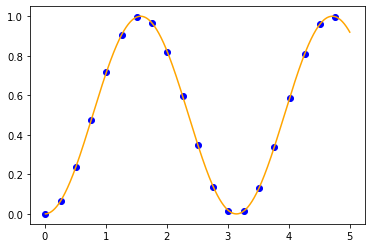

In [47]:
EPOCHS = 2000

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

regressor = LinearRegression()

for i in range(EPOCHS):
    regressor.fit(X_train, y_train)

plt.plot(
    t[::100],
    np.hstack([y_train, regressor.predict(X_test)])[::100],
    'bo',
)

plt.plot(t, Y, 'orange')

In [49]:
for x in np.eye(3, 3):
    print(*x)

1.0 0.0 0.0
0.0 1.0 0.0
0.0 0.0 1.0


In [ ]:
for i in range(EPOCHS):
    regressor.fit(X_train, y_train)